### Compare results of different experiments

In [3]:
import os, sys
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import lines as mlines
from pathlib import Path

sys.path.append('..')
%load_ext autoreload
%autoreload 2

In [4]:
from modules.evalutils import get_dir_nums, get_tbls, param_diffs
from modules.evalutils import conj_plot_data

In [288]:
nums = get_dir_nums(log_dir='../dbin/')
print(nums)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]


In [289]:
ret = get_tbls('basicexp', nums, log_dir='../dbin/')

d_metrics, d_resid, d_params = ret

In [290]:
tmp  = d_metrics.join(d_params[['_test_path']], 
                      on='exp_name', 
                      how='left',)

In [291]:
test_accs2 = tmp.groupby([ '_test_path','exp_name',]).agg(
                                ['max'])['test_accuracy']

In [292]:
test_accs2.sort_values(by='max', ascending=False).head(15)

max
_test_path                                       exp_name             
../../../other-chess-data/regulation-test-2-easy basicexp-16  0.938272
                                                 basicexp-11  0.932099
                                                 basicexp-10  0.907407
                                                 basicexp-17  0.907407
                                                 basicexp-12  0.895062
                                                 basicexp-13  0.888889
                                                 basicexp-41  0.888889
../../../other-chess-data/regulation-test-2-all  basicexp-21  0.885965
                                                 basicexp-24  0.881579
                                                 basicexp-28  0.881579
                                                 basicexp-31  0.877193
../../../other-chess-data/regulation-test-2-easy basicexp-44  0.876543
                                                 basicexp-42  0.876543
../../../other-chess-data/regulation-test-2-all  basicexp-6   0.872807
                                                 basicexp-32  0.855263

In [293]:
tps = d_params['_test_path'].unique();tps

array(['../../../other-chess-data/regulation-test-all-2',
       '../../../other-chess-data/regulation-test-2-all',
       '../../../other-chess-data/regulation-test-2-easy'], dtype=object)

In [294]:
tp_all =  '../../../other-chess-data/regulation-test-2-all'
exps = d_params[d_params['_test_path']  == tp_all].index

In [295]:
exp_metrics= d_metrics[d_metrics['exp_name'].isin(exps)]

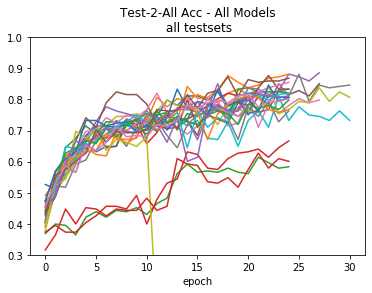

In [296]:
df_agg =pd.pivot(exp_metrics,
                 index='exp_name', 
                 columns='epoch', 
                 values='test_accuracy')

df_agg.T.plot(legend=None, 
              title='Test-2-All Acc - All Models\n all testsets',
              ylim = (.3,1));

##### expbuilder-2d: fit_one_cycle epochs

In [14]:
cmp_param = '_fit_one_cycle_epochs'

In [15]:
tmp  = d_metrics.join(d_params[[cmp_param]], on='exp_name')

exp_metrics = tmp[tmp['_fit_one_cycle_epochs'] != 10]

In [16]:
df_agg =pd.pivot(exp_metrics,
                 index='exp_name', 
                 columns='epoch', 
                 values='test_accuracy')

In [17]:
df = exp_metrics.copy()
df = df[['exp_name', cmp_param]]
df = df.drop_duplicates()
df.index = df['exp_name']

In [18]:
colors = ['blue','orange','red','green','magenta','yellow','black',]

unique_vals = df[cmp_param].unique()

color_ind = pd.Series(colors[:len(unique_vals)] ,
                      index=unique_vals)

df = df.merge(color_ind.rename('color'),
         how='left', 
         left_on=cmp_param, 
         right_index=True
        )

df_agg = df_agg.join(df[['color']], on='exp_name', )

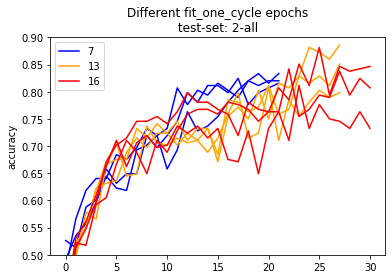

In [19]:
for i in range(df_agg.shape[0]):
    plt.plot(df_agg.T.iloc[:-1,i], 
             c=df_agg.T.loc['color'][i])
    
plt.title('Different fit_one_cycle epochs\n test-set: 2-all ')
plt.ylabel('accuracy')

handles = [mlines.Line2D([],[],c=color) 
           for color in color_ind.values ]
plt.legend(handles, [str(e) for e in color_ind.index])

axes = plt.gca()
axes.set_ylim([.5, .9]);

##### expbuild2b - dirrent model archs

In [20]:
cmp_param = '_model_arch'

In [21]:
base = 'basicexp-'
nums = range(8,13+1)
exps = [base + str(i) for i in nums]

exp_params = d_params.T[exps]
exp_metrics= d_metrics[d_metrics['exp_name'].isin(exps)]

In [22]:
# exps = [base + str(i) for i in nums]
# exp_params = d_params.T[exps]
param_diffs(exp_params)

_model_arch    3
_train_seed    2
model_fn       6
dtype: int64

In [23]:
exp_params.T['_test_path'].unique()

array(['../../../other-chess-data/regulation-test-2-easy'], dtype=object)

In [24]:
exp_metrics  = exp_metrics.join(d_params[[cmp_param]], 
                                on='exp_name')

In [25]:
df_agg, color_ind = conj_plot_data(exp_metrics, cmp_param)

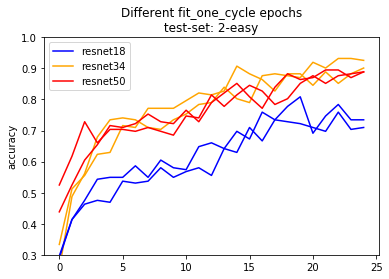

In [26]:
for i in range(df_agg.shape[0]):
    plt.plot(df_agg.T.iloc[:-1,i], 
             c=df_agg.T.loc['color'][i])
    
plt.title('Different fit_one_cycle epochs\n test-set: 2-easy ')
plt.ylabel('accuracy')

handles = [mlines.Line2D([],[],c=color) 
           for color in color_ind.values ]
plt.legend(handles, [str(e) for e in color_ind.index])

axes = plt.gca()
axes.set_ylim([.3, 1.0]);

##### expbuilder 3 - old data vs cleaned data

In [75]:
cmp_param = '_condition_name'

In [76]:
exps_default = d_params.iloc[5:8,:].index ; exps_default

Index(['basicexp-5', 'basicexp-6', 'basicexp-7'], dtype='object')

In [77]:
exps_diff = d_params[d_params['_condition_name'] == 'clean-data'].index
exps_diff

Index(['basicexp-27', 'basicexp-28', 'basicexp-29'], dtype='object')

In [78]:
exps_all = exps_default.to_list() 
exps_all += exps_diff.to_list()

In [79]:
tmp  = d_metrics.join(d_params[[cmp_param]], on='exp_name')

exp_metrics = tmp[tmp['exp_name'].isin(exps_all)]

In [80]:
exp_metrics['exp_name'].unique()

array(['basicexp-5', 'basicexp-6', 'basicexp-7', 'basicexp-27',
       'basicexp-28', 'basicexp-29'], dtype=object)

In [81]:
d_params.loc[exps_all, '_test_path'].unique()

array(['../../../other-chess-data/regulation-test-2-all'], dtype=object)

In [82]:
df_agg =pd.pivot(exp_metrics,
                 index='exp_name', 
                 columns='epoch', 
                 values='test_accuracy')

In [83]:
df = exp_metrics.copy()
df = df[['exp_name', cmp_param]]
df = df.drop_duplicates()
df.index = df['exp_name']

In [84]:
colors = ['blue','orange','red','green','magenta','yellow','black',]

unique_vals = df[cmp_param].unique()

color_ind = pd.Series(colors[:len(unique_vals)] ,
                      index=unique_vals)

df = df.merge(color_ind.rename('color'),
         how='left', 
         left_on=cmp_param, 
         right_index=True
        )

df_agg = df_agg.join(df[['color']], on='exp_name', )

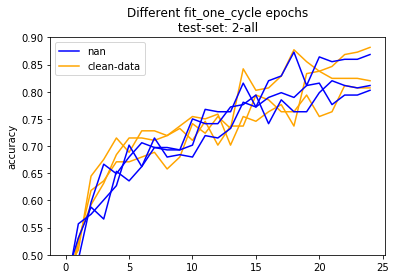

In [85]:
for i in range(df_agg.shape[0]):
    plt.plot(df_agg.T.iloc[:-1,i], 
             c=df_agg.T.loc['color'][i])
    
plt.title('Different fit_one_cycle epochs\n test-set: 2-all ')
plt.ylabel('accuracy')

handles = [mlines.Line2D([],[],c=color) 
           for color in color_ind.values ]
plt.legend(handles, [str(e) for e in color_ind.index])

axes = plt.gca()
axes.set_ylim([.5, .9]);

In [86]:
df_agg.iloc[:,-5:]

,21,22,23,24,color
exp_name,,,,,
basicexp-27,0.763158,0.811404,0.807018,0.807018,orange
basicexp-28,0.846491,0.868421,0.872807,0.881579,orange
basicexp-29,0.824561,0.824561,0.824561,0.820175,orange
basicexp-5,0.820175,0.811404,0.807018,0.811404,blue
basicexp-6,0.855263,0.859649,0.859649,0.868421,blue
basicexp-7,0.776316,0.793860,0.793860,0.802632,blue


##### expbuilder 3b - batch size

In [230]:
cmp_param = '_bs'

In [231]:
exps_default = d_params.iloc[5:8,:].index ; exps_default

Index(['basicexp-5', 'basicexp-6', 'basicexp-7'], dtype='object')

In [232]:
import numpy as np
def foo(x):
    if pd.isnull(x): return False
    if x == 32: return False
    return True

In [233]:
exps_diff = d_params[d_params['_bs'].map(lambda x: foo(x))].index
exps_diff

Index(['basicexp-30', 'basicexp-31', 'basicexp-32', 'basicexp-33',
       'basicexp-34', 'basicexp-35', 'basicexp-36', 'basicexp-37',
       'basicexp-38'],
      dtype='object')

In [234]:
exps_all = exps_default.to_list() 
exps_all += exps_diff.to_list()

In [235]:
exp_params = d_params.T[exps_all]
param_diffs(exp_params)

_train_seed         3
_bs                 4
model_fn           12
_expdesign_name     2
_condition_name     4
dtype: int64

In [236]:
tmp  = d_metrics.join(d_params[[cmp_param]], on='exp_name')

exp_metrics = tmp[tmp['exp_name'].isin(exps_all)]

In [237]:
exp_metrics['exp_name'].unique()

array(['basicexp-5', 'basicexp-6', 'basicexp-7', 'basicexp-30',
       'basicexp-31', 'basicexp-32', 'basicexp-33', 'basicexp-34',
       'basicexp-35', 'basicexp-36', 'basicexp-37', 'basicexp-38'],
      dtype=object)

In [238]:
d_params.loc[exps_all, '_test_path'].unique()

array(['../../../other-chess-data/regulation-test-2-all'], dtype=object)

In [244]:
df_agg, color_ind = conj_plot_data(exp_metrics, cmp_param)

[32  8 16 22]


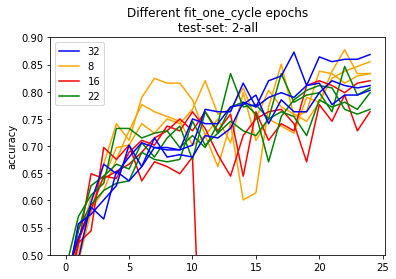

In [245]:
for i in range(df_agg.shape[0]):
    plt.plot(df_agg.T.iloc[:-1,i], 
             c=df_agg.T.loc['color'][i])
    
plt.title('Different fit_one_cycle epochs\n test-set: 2-all ')
plt.ylabel('accuracy')

handles = [mlines.Line2D([],[],c=color) 
           for color in color_ind.values ]
plt.legend(handles, [str(e) for e in color_ind.index])

axes = plt.gca()
axes.set_ylim([.5, .9]);

In [193]:
df_agg.iloc[:,-5:]

,21,22,23,24,color
exp_name,,,,,
basicexp-30,0.833333,0.815789,0.828947,0.833333,orange
basicexp-31,0.837719,0.877193,0.833333,0.833333,orange
basicexp-32,0.824561,0.837719,0.846491,0.855263,orange
basicexp-33,0.745614,0.793860,0.728070,0.763158,red
basicexp-34,0.078947,0.078947,0.078947,0.078947,red
basicexp-35,0.811404,0.798246,0.815789,0.820175,red
basicexp-36,0.763158,0.846491,0.793860,0.807018,green
basicexp-37,0.807018,0.767544,0.758772,0.767544,green
basicexp-38,0.771930,0.780702,0.767544,0.798246,green


##### Seed Effect

In [120]:
#lucky seed
d_params.loc[['basicexp-6', 'basicexp-28'],'_train_seed']

basicexp-6     1
basicexp-28    1
Name: _train_seed, dtype: int64

In [121]:
test_all = '../../../other-chess-data/regulation-test-2-all'
# d_metrics2 = d_metrics[d_metrics['_test_path'] == test_all]

In [122]:
cmp_param = '_train_seed'
tmp  = d_metrics.join(d_params[[cmp_param]], on='exp_name')

In [148]:
df = df.groupby('exp_name').agg('max')
df = df[['test_accuracy', '_train_seed']]
df.sort_values(by='test_accuracy', ascending=False).head(12)

,test_accuracy,_train_seed
exp_name,,
basicexp-16,0.938272,0
basicexp-11,0.932099,1
basicexp-10,0.907407,0
basicexp-17,0.907407,1
basicexp-12,0.895062,0
basicexp-41,0.888889,0
basicexp-13,0.888889,1
basicexp-21,0.885965,0
basicexp-28,0.881579,1


##### Compare Data Sizes

In [246]:
cmp_param = '_condition_name'

In [274]:
# defaults for easy test
exps_default = d_params.iloc[12:14,:].index ; exps_default

Index(['basicexp-12', 'basicexp-13'], dtype='object')

In [275]:
exps_diff = d_params[d_params['_expdesign_name']=='data-amount'].index
exps_diff

Index(['basicexp-39', 'basicexp-40', 'basicexp-41', 'basicexp-42',
       'basicexp-43', 'basicexp-44'],
      dtype='object')

In [276]:
exps_all = exps_default.to_list() 
exps_all += exps_diff.to_list()

In [277]:
exp_params = d_params.T[exps_all]
param_diffs(exp_params)

_test_name                   2
_train_seed                  2
_custom_train_fnames         2
_custom_train_fnames_args    7
model_fn                     8
_expdesign_name              2
_condition_name              4
dtype: int64

In [278]:
tmp  = d_metrics.join(d_params[[cmp_param]], on='exp_name')

exp_metrics = tmp[tmp['exp_name'].isin(exps_all)]

In [279]:
exp_metrics['exp_name'].unique()

array(['basicexp-12', 'basicexp-13', 'basicexp-39', 'basicexp-40',
       'basicexp-41', 'basicexp-42', 'basicexp-43', 'basicexp-44'],
      dtype=object)

In [280]:
d_params.loc[exps_all, '_test_path'].unique()

array(['../../../other-chess-data/regulation-test-2-easy'], dtype=object)

In [281]:
df_agg, color_ind = conj_plot_data(exp_metrics, cmp_param)

[nan 'n=800' 'n=1400' 'n=2200']


In [282]:
def foo(x): 
    if pd.isna(x):return 'blue'
    else: return x

In [283]:
color_ind

nan         blue
n=800     orange
n=1400       red
n=2200     green
dtype: object

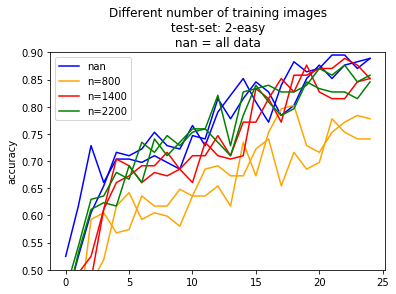

In [286]:
for i in range(df_agg.shape[0]):
    plt.plot(df_agg.T.iloc[:-1,i], 
             c=foo(df_agg.T.loc['color'][i]))
    
plt.title('Different number of training images\n test-set: 2-easy \n nan = all data ')
plt.ylabel('accuracy')

handles = [mlines.Line2D([],[],c=foo(color)) 
           for color in color_ind.values ]
plt.legend(handles, [str(e) for e in color_ind.index])

axes = plt.gca()
axes.set_ylim([.5, .9]);

In [271]:
df_agg.iloc[:,-5:]

,21,22,23,24,color
exp_name,,,,,
basicexp-39,0.753086,0.771605,0.783951,0.777778,orange
basicexp-40,0.777778,0.753086,0.740741,0.740741,orange
basicexp-41,0.870370,0.888889,0.876543,0.851852,red
basicexp-42,0.814815,0.814815,0.845679,0.851852,red
basicexp-43,0.827160,0.827160,0.814815,0.845679,green
basicexp-44,0.858025,0.876543,0.845679,0.858025,green
basicexp-5,0.820175,0.811404,0.807018,0.811404,NaN
basicexp-6,0.855263,0.859649,0.859649,0.868421,NaN
basicexp-7,0.776316,0.793860,0.793860,0.802632,NaN
